Function for Monte-Carlo simulation

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve


class hawkes():
    def __init__(self, nbr, T, mu, alpha, beta):
        self.nbr = nbr
        self.T = T
        self.mu = mu
        self.alpha = alpha
        self.beta = beta
        self.count = np.zeros(self.nbr, dtype = "int")
        self.jtimes = [[] for _ in range(nbr)]

    def calculate(self, s):
        lambdam = [self.mu for _ in range(self.nbr)]
        for m in range(self.nbr):
            for n in range(self.nbr):
                for k in range(self.count[n]):
                    lambdam[m] += self.alpha[n][m] * exp(-self.beta*(s-self.jtimes[n][k]))
        return lambdam

    def simulate(self):
        s = 0.0
        while s < self.T:
            lambdabar = sum(self.calculate(s))

            u = np.random.uniform()
            w = -log(u)/lambdabar
            s += w

            lambdams = self.calculate(s)
            lambdabars = sum(lambdams)

            k = None
            D = np.random.uniform()
            if D <= lambdabars/lambdabar:
                lambdamk = 0.0
                for k in range(nbr):
                    if (lambdamk < D*lambdabar and D*lambdabar <= lambdamk + lambdams[k]):
                        break
                    lambdamk += lambdams[k]
                self.count[k] += 1
                self.jtimes[k].append(s)
            if k is not None and self.jtimes[k][self.count[k] - 1] > self.T:
                self.count[k] -= 1
                self.jtimes[k].pop()

Monte-Carlo simulation of the multivariate Hawkes process with the given parameters

In [33]:
nbr = 2

sample_size = 10**5
sample_mean = [0 for _ in range(nbr)]
sample_var = [0 for _ in range(nbr)]
sample_covar = [0 for _ in range(nbr - 1)]

w = 10
b = 50
t = 0.1

alpha = [[0, -w], [w, 0]]
beta = b
mu = 250
n1 = []
n2 = []
for i in range(sample_size):
    eg1 = hawkes(nbr = 2, T = t, mu = mu, alpha = alpha, beta = beta)
    eg1.simulate()
    for j in range(nbr):
      sample_mean[j] += eg1.count[j]
      sample_var[j] += (eg1.count[j]**2)
    n1.append(eg1.count[0])
    n2.append(eg1.count[1])
      

for j in range(nbr):
    sample_mean[j] /= (sample_size*1.0)
    sample_var[j] -= ((sample_mean[j]**2)*sample_size)
    sample_var[j] /= ((sample_size - 1)*1.0)

for i in range(sample_size):
    sample_covar[0] += ((n1[i] - sample_mean[0])*(n2[i] - sample_mean[1]))

sample_covar[0] /= (sample_size-1)

print(sample_covar)

[-1.5582708177081708]


Computation of real cumulants using formulas obtained from the [paper](https://journals.aps.org/pre/accepted/cb07dRacCa21971239b469d66c0b2766025f79f92)

In [34]:
mean = [0, 0]
var = [0, 0]
covar = [0]
mean[0] = (((0.250e3 * b * b * w - 0.500e3 * b * w * w - 0.250e3 * pow(w, 0.3e1)) * cos(w * t) + (-0.250e3 * b * b * w - 0.500e3 * b * w * w + 0.250e3 * pow(w, 0.3e1)) * sin(w * t)) * exp(-0.1e1 * b * t) + (0.250e3 * b * t + 0.250e3) * pow(w, 0.3e1) + (0.250e3 * b * b * t + 0.500e3 * b) * w * w + (0.250e3 * pow(b, 0.3e1) * t - 0.250e3 * b * b) * w + 0.250e3 * pow(b, 0.4e1) * t) * pow(b * b + w * w, -0.2e1)
mean[1] = (((-0.250e3 * b * b * w - 0.500e3 * b * w * w + 0.250e3 * pow(w, 0.3e1)) * cos(w * t) + (-0.250e3 * b * b * w + 0.500e3 * b * w * w + 0.250e3 * pow(w, 0.3e1)) * sin(w * t)) * exp(-0.1e1 * b * t) + (-0.250e3 * b * t - 0.250e3) * pow(w, 0.3e1) + (0.250e3 * b * b * t + 0.500e3 * b) * w * w + (-0.250e3 * pow(b, 0.3e1) * t + 0.250e3 * b * b) * w + 0.250e3 * pow(b, 0.4e1) * t) * pow(b * b + w * w, -0.2e1)
var[0] = ((((0.2250e4 + 0.2250e4 * b * t) * pow(w, 0.9e1) + (0.6750e4 * b * b * t + 0.2750e4 * b) * pow(w, 0.8e1) + (0.4750e4 * pow(b, 0.3e1) * t + 0.9250e4 * b * b) * pow(w, 0.7e1) + (0.5250e4 * pow(b, 0.4e1) * t + 0.10250e5 * pow(b, 0.3e1)) * pow(w, 0.6e1) + (0.2750e4 * pow(b, 0.5e1) * t + 0.3250e4 * pow(b, 0.4e1)) * pow(w, 0.5e1) + (-0.9750e4 * pow(b, 0.5e1) - 0.1750e4 * pow(b, 0.6e1) * t) * pow(w, 0.4e1) + (-0.4250e4 * pow(b, 0.6e1) + 0.250e3 * pow(b, 0.7e1) * t) * pow(w, 0.3e1) + (-0.1250e4 * pow(b, 0.7e1) - 0.250e3 * pow(b, 0.8e1) * t) * w * w - 0.500e3 * pow(b, 0.8e1) * w) * sin(w * t) + ((0.750e3 + 0.2250e4 * b * t) * pow(w, 0.9e1) - 0.2250e4 * b * b * t * pow(w, 0.8e1) + (-0.500e3 * b * b - 0.4250e4 * pow(b, 0.3e1) * t) * pow(w, 0.7e1) + (-0.9000e4 * pow(b, 0.3e1) - 0.4750e4 * pow(b, 0.4e1) * t) * pow(w, 0.6e1) + (-0.17000e5 * pow(b, 0.4e1) - 0.7250e4 * pow(b, 0.5e1) * t) * pow(w, 0.5e1) + (-0.2750e4 * pow(b, 0.6e1) * t - 0.10000e5 * pow(b, 0.5e1)) * pow(w, 0.4e1) + (-0.750e3 * pow(b, 0.7e1) * t + 0.500e3 * pow(b, 0.6e1)) * pow(w, 0.3e1) + (-0.1000e4 * pow(b, 0.7e1) - 0.250e3 * pow(b, 0.8e1) * t) * w * w + 0.250e3 * pow(b, 0.8e1) * w) * cos(w * t)) * exp(-0.1e1 * b * t) + ((-0.125e3 * pow(b, 0.6e1) * pow(w, 0.3e1) + 0.500e3 * pow(b, 0.4e1) * pow(w, 0.5e1) + 0.3875e4 * b * b * pow(w, 0.7e1) - 0.750e3 * pow(w, 0.9e1)) * cos(0.2e1 * w * t) + (0.625e3 * pow(b, 0.5e1) * pow(w, 0.4e1) + 0.1750e4 * pow(b, 0.3e1) * pow(w, 0.6e1) - 0.2875e4 * b * pow(w, 0.8e1)) * sin(0.2e1 * w * t) - 0.2375e4 * pow(b, 0.3e1) * pow(w, 0.6e1) - 0.1125e4 * b * pow(w, 0.8e1) - 0.125e3 * pow(b, 0.7e1) * w * w - 0.1375e4 * pow(b, 0.5e1) * pow(w, 0.4e1)) * exp(-0.2e1 * b * t) + 0.1125e4 * b * pow(w, 0.8e1) + (-0.3375e4 * b * b - 0.2250e4 * pow(b, 0.3e1) * t) * pow(w, 0.7e1) + (0.11375e5 * pow(b, 0.3e1) + 0.2250e4 * pow(b, 0.4e1) * t) * pow(w, 0.6e1) + (0.16500e5 * pow(b, 0.4e1) - 0.250e3 * pow(b, 0.5e1) * t) * pow(w, 0.5e1) + (0.11375e5 * pow(b, 0.5e1) + 0.4750e4 * pow(b, 0.6e1) * t) * pow(w, 0.4e1) + (-0.375e3 * pow(b, 0.6e1) + 0.2250e4 * pow(b, 0.7e1) * t) * pow(w, 0.3e1) + (0.1125e4 * pow(b, 0.7e1) + 0.2750e4 * pow(b, 0.8e1) * t) * w * w + (-0.250e3 * pow(b, 0.8e1) + 0.250e3 * pow(b, 0.9e1) * t) * w + 0.250e3 * pow(b, 0.10e2) * t) / (pow(b, 0.4e1) + 0.2e1 * b * b * w * w + pow(w, 0.4e1)) * pow(b * b + w * w, -0.2e1) / (b * b + 0.9e1 * w * w)
var[1] = ((((0.2250e4 + 0.2250e4 * b * t) * pow(w, 0.9e1) + (-0.6750e4 * b * b * t - 0.2750e4 * b) * pow(w, 0.8e1) + (0.4750e4 * pow(b, 0.3e1) * t + 0.9250e4 * b * b) * pow(w, 0.7e1) + (-0.5250e4 * pow(b, 0.4e1) * t - 0.10250e5 * pow(b, 0.3e1)) * pow(w, 0.6e1) + (0.2750e4 * pow(b, 0.5e1) * t + 0.3250e4 * pow(b, 0.4e1)) * pow(w, 0.5e1) + (0.1750e4 * pow(b, 0.6e1) * t + 0.9750e4 * pow(b, 0.5e1)) * pow(w, 0.4e1) + (-0.4250e4 * pow(b, 0.6e1) + 0.250e3 * pow(b, 0.7e1) * t) * pow(w, 0.3e1) + (0.250e3 * pow(b, 0.8e1) * t + 0.1250e4 * pow(b, 0.7e1)) * w * w - 0.500e3 * pow(b, 0.8e1) * w) * sin(w * t) + ((-0.750e3 - 0.2250e4 * b * t) * pow(w, 0.9e1) - 0.2250e4 * b * b * t * pow(w, 0.8e1) + (0.4250e4 * pow(b, 0.3e1) * t + 0.500e3 * b * b) * pow(w, 0.7e1) + (-0.9000e4 * pow(b, 0.3e1) - 0.4750e4 * pow(b, 0.4e1) * t) * pow(w, 0.6e1) + (0.7250e4 * pow(b, 0.5e1) * t + 0.17000e5 * pow(b, 0.4e1)) * pow(w, 0.5e1) + (-0.2750e4 * pow(b, 0.6e1) * t - 0.10000e5 * pow(b, 0.5e1)) * pow(w, 0.4e1) + (0.750e3 * pow(b, 0.7e1) * t - 0.500e3 * pow(b, 0.6e1)) * pow(w, 0.3e1) + (-0.1000e4 * pow(b, 0.7e1) - 0.250e3 * pow(b, 0.8e1) * t) * w * w - 0.250e3 * pow(b, 0.8e1) * w) * cos(w * t)) * exp(-0.1e1 * b * t) + ((0.125e3 * pow(b, 0.6e1) * pow(w, 0.3e1) - 0.500e3 * pow(b, 0.4e1) * pow(w, 0.5e1) - 0.3875e4 * b * b * pow(w, 0.7e1) + 0.750e3 * pow(w, 0.9e1)) * cos(0.2e1 * w * t) + (-0.625e3 * pow(b, 0.5e1) * pow(w, 0.4e1) - 0.1750e4 * pow(b, 0.3e1) * pow(w, 0.6e1) + 0.2875e4 * b * pow(w, 0.8e1)) * sin(0.2e1 * w * t) - 0.2375e4 * pow(b, 0.3e1) * pow(w, 0.6e1) - 0.1125e4 * b * pow(w, 0.8e1) - 0.125e3 * pow(b, 0.7e1) * w * w - 0.1375e4 * pow(b, 0.5e1) * pow(w, 0.4e1)) * exp(-0.2e1 * b * t) + 0.1125e4 * b * pow(w, 0.8e1) + (0.3375e4 * b * b + 0.2250e4 * pow(b, 0.3e1) * t) * pow(w, 0.7e1) + (0.11375e5 * pow(b, 0.3e1) + 0.2250e4 * pow(b, 0.4e1) * t) * pow(w, 0.6e1) + (-0.16500e5 * pow(b, 0.4e1) + 0.250e3 * pow(b, 0.5e1) * t) * pow(w, 0.5e1) + (0.11375e5 * pow(b, 0.5e1) + 0.4750e4 * pow(b, 0.6e1) * t) * pow(w, 0.4e1) + (0.375e3 * pow(b, 0.6e1) - 0.2250e4 * pow(b, 0.7e1) * t) * pow(w, 0.3e1) + (0.1125e4 * pow(b, 0.7e1) + 0.2750e4 * pow(b, 0.8e1) * t) * w * w + (0.250e3 * pow(b, 0.8e1) - 0.250e3 * pow(b, 0.9e1) * t) * w + 0.250e3 * pow(b, 0.10e2) * t) / (pow(b, 0.4e1) + 0.2e1 * b * b * w * w + pow(w, 0.4e1)) * pow(b * b + w * w, -0.2e1) / (b * b + 0.9e1 * w * w)
covar[0] = ((((-0.2250e4 * b * t - 0.1500e4) * pow(w, 0.9e1) + (-0.750e3 * b * b + 0.4250e4 * pow(b, 0.3e1) * t) * pow(w, 0.7e1) + (0.16750e5 * pow(b, 0.4e1) + 0.7250e4 * pow(b, 0.5e1) * t) * pow(w, 0.5e1) + (-0.250e3 * pow(b, 0.6e1) + 0.750e3 * pow(b, 0.7e1) * t) * pow(w, 0.3e1) - 0.250e3 * pow(b, 0.8e1) * w) * sin(w * t) + ((0.4000e4 * b + 0.6750e4 * b * b * t) * pow(w, 0.8e1) + (0.13000e5 * pow(b, 0.3e1) + 0.5250e4 * pow(b, 0.4e1) * t) * pow(w, 0.6e1) + (-0.8000e4 * pow(b, 0.5e1) - 0.1750e4 * pow(b, 0.6e1) * t) * pow(w, 0.4e1) + (-0.1000e4 * pow(b, 0.7e1) - 0.250e3 * pow(b, 0.8e1) * t) * w * w) * cos(w * t)) * exp(-0.1e1 * b * t) + 0.125e3 * w * ((0.6e1 * pow(w, 0.8e1) + 0.1e1 * pow(b, 0.6e1) * w * w - 0.4e1 * pow(b, 0.4e1) * pow(w, 0.4e1) - 0.31e2 * pow(w, 0.6e1) * b * b) * sin(0.2e1 * w * t) + (0.14e2 * pow(w, 0.5e1) * pow(b, 0.3e1) - 0.23e2 * pow(w, 0.7e1) * b + 0.5e1 * pow(b, 0.5e1) * pow(w, 0.3e1)) * cos(0.2e1 * w * t)) * exp(-0.2e1 * b * t) - 0.1125e4 * b * pow(w, 0.8e1) + (-0.14750e5 * pow(b, 0.3e1) - 0.4500e4 * pow(b, 0.4e1) * t) * pow(w, 0.6e1) + (0.7375e4 * pow(b, 0.5e1) - 0.5000e4 * pow(b, 0.6e1) * t) * pow(w, 0.4e1) + (0.1000e4 * pow(b, 0.7e1) - 0.500e3 * pow(b, 0.8e1) * t) * w * w) * pow(b * b + w * w, -0.3e1) / (pow(b, 0.4e1) + 0.10e2 * b * b * w * w + 0.9e1 * pow(w, 0.4e1))

In [39]:
print(sample_mean)
print(mean)
print(sample_var)
print(var)
print(sample_covar)
print(covar)

[28.3132, 20.4799]
[28.3231580858621, 20.48065255256024]
[27.226441041910512, 20.821873408734024]
[27.561190372772554, 20.24516825245136]
[-1.5582708177081708]
[-1.1443026131197649]


Plot of functions to compute mean - An intersection indicates the solution of the system of 2 equations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


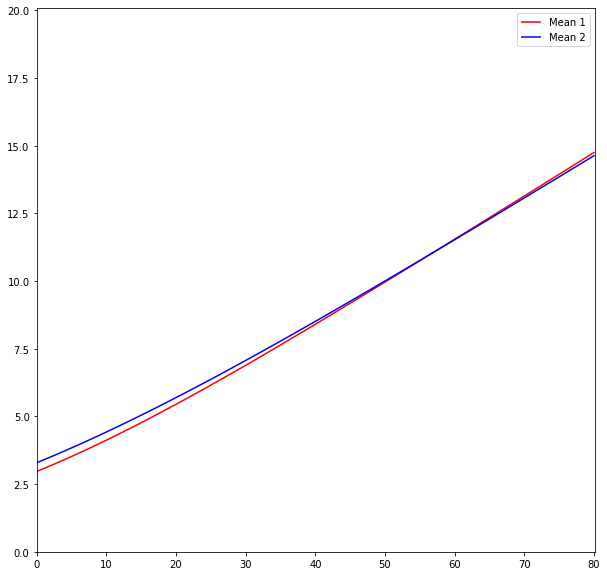

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
delta = 0.025
b, w = np.meshgrid(np.arange(0, 80.1, delta), np.arange(0, 20.1, delta))

t = 0.1
f1 = -sample_mean[0] + (((0.250e3 * b * b * w - 0.500e3 * b * w * w - 0.250e3 * np.power(w, 0.3e1)) * np.cos(w * t) + (-0.250e3 * b * b * w - 0.500e3 * b * w * w + 0.250e3 * np.power(w, 0.3e1)) * np.sin(w * t)) * np.exp(-0.1e1 * b * t) + (0.250e3 * b * t + 0.250e3) * np.power(w, 0.3e1) + (0.250e3 * b * b * t + 0.500e3 * b) * w * w + (0.250e3 * np.power(b, 0.3e1) * t - 0.250e3 * b * b) * w + 0.250e3 * np.power(b, 0.4e1) * t) * np.power(b * b + w * w, -0.2e1)
f2 = -sample_mean[1] + (((-0.250e3 * b * b * w - 0.500e3 * b * w * w + 0.250e3 * np.power(w, 0.3e1)) * np.cos(w * t) + (-0.250e3 * b * b * w + 0.500e3 * b * w * w + 0.250e3 * np.power(w, 0.3e1)) * np.sin(w * t)) * np.exp(-0.1e1 * b * t) + (-0.250e3 * b * t - 0.250e3) * np.power(w, 0.3e1) + (0.250e3 * b * b * t + 0.500e3 * b) * w * w + (-0.250e3 * np.power(b, 0.3e1) * t + 0.250e3 * b * b) * w + 0.250e3 * np.power(b, 0.4e1) * t) * np.power(b * b + w * w, -0.2e1)

cntr1 = ax.contour(b, w, f1, [0], colors = "red")
cntr2 = ax.contour(b, w, f2, [0], colors = "blue")
h1,_ = cntr1.legend_elements()
h2,_ = cntr2.legend_elements()
ax.legend([h1[0], h2[0]], ['Mean 1', 'Mean 2'])
plt.show()

Solve the system of nonlinear equations using function fsolve from scipy package

In [40]:
def sys_of_eqn(z):
  b = z[0]
  w = z[1]
  F = np.empty(2)
  t = 0.1
  F[0] = -sample_mean[0] + (((0.250e3 * b * b * w - 0.500e3 * b * w * w - 0.250e3 * pow(w, 0.3e1)) * cos(w * t) + (-0.250e3 * b * b * w - 0.500e3 * b * w * w + 0.250e3 * pow(w, 0.3e1)) * sin(w * t)) * exp(-0.1e1 * b * t) + (0.250e3 * b * t + 0.250e3) * pow(w, 0.3e1) + (0.250e3 * b * b * t + 0.500e3 * b) * w * w + (0.250e3 * pow(b, 0.3e1) * t - 0.250e3 * b * b) * w + 0.250e3 * pow(b, 0.4e1) * t) * pow(b * b + w * w, -0.2e1)
  F[1] = -sample_mean[1] + (((-0.250e3 * b * b * w - 0.500e3 * b * w * w + 0.250e3 * pow(w, 0.3e1)) * cos(w * t) + (-0.250e3 * b * b * w + 0.500e3 * b * w * w + 0.250e3 * pow(w, 0.3e1)) * sin(w * t)) * exp(-0.1e1 * b * t) + (-0.250e3 * b * t - 0.250e3) * pow(w, 0.3e1) + (0.250e3 * b * b * t + 0.500e3 * b) * w * w + (-0.250e3 * pow(b, 0.3e1) * t + 0.250e3 * b * b) * w + 0.250e3 * pow(b, 0.4e1) * t) * pow(b * b + w * w, -0.2e1)
  return F

zGuess = np.array([50,10])
z = fsolve(sys_of_eqn, zGuess)
print(z)

[56.61525205 11.00689763]


In [41]:
pip install gekko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 5.0 MB/s 


Using another library to solve the system of nonlinear equations - gekko library

In [42]:
from gekko import GEKKO
m = GEKKO()
b = m.Var(value = 50.0)
w = m.Var(value = 10.0)
m.Equations([(((0.250e3 * b * b * w - 0.500e3 * b * w * w - 0.250e3 * np.power(w, 0.3e1)) * m.cos(w * 0.1) + (-0.250e3 * b * b * w - 0.500e3 * b * w * w + 0.250e3 * np.power(w, 0.3e1)) * m.sin(w * 0.1)) * m.exp(-0.1e1 * b * 0.1) + (0.250e3 * b * 0.1 + 0.250e3) * np.power(w, 0.3e1) + (0.250e3 * b * b * 0.1 + 0.500e3 * b) * w * w + (0.250e3 * np.power(b, 0.3e1) * 0.1 - 0.250e3 * b * b) * w + 0.250e3 * np.power(b, 0.4e1) * 0.1) * np.power(b * b + w * w, -0.2e1) == sample_mean[0],
             (((-0.250e3 * b * b * w - 0.500e3 * b * w * w + 0.250e3 * np.power(w, 0.3e1)) * m.cos(w * 0.1) + (-0.250e3 * b * b * w + 0.500e3 * b * w * w + 0.250e3 * np.power(w, 0.3e1)) * m.sin(w * 0.1)) * m.exp(-0.1e1 * b * 0.1) + (-0.250e3 * b * 0.1 - 0.250e3) * np.power(w, 0.3e1) + (0.250e3 * b * b * 0.1 + 0.500e3 * b) * w * w + (-0.250e3 * np.power(b, 0.3e1) * 0.1 + 0.250e3 * b * b) * w + 0.250e3 * np.power(b, 0.4e1) * 0.1) * np.power(b * b + w * w, -0.2e1) == sample_mean[1]
])
m.solve(disp=False)
print(b.value, w.value)

Exception: ignored

Using the third library to solve the system of nonlinear equations, to ensure consistency and accuracy of the results

In [ ]:
import sympy as sym
sym.init_printing()
b, w = sym.symbols('b, w')
f = sym.Eq((((0.250e3 * b * b * w - 0.500e3 * b * w * w - 0.250e3 * sym.Pow(w, 0.3e1)) * sym.cos(w * t) + (-0.250e3 * b * b * w - 0.500e3 * b * w * w + 0.250e3 * sym.Pow(w, 0.3e1)) * sym.sin(w * t)) * sym.exp(-0.1e1 * b * t) + (0.250e3 * b * t + 0.250e3) * sym.Pow(w, 0.3e1) + (0.250e3 * b * b * t + 0.500e3 * b) * w * w + (0.250e3 * sym.Pow(b, 0.3e1) * t - 0.250e3 * b * b) * w + 0.250e3 * sym.Pow(b, 0.4e1) * t) * sym.Pow(b * b + w * w, -0.2e1), sample_mean[0])
g = sym.Eq((((-0.250e3 * b * b * w - 0.500e3 * b * w * w + 0.250e3 * sym.Pow(w, 0.3e1)) * sym.cos(w * t) + (-0.250e3 * b * b * w + 0.500e3 * b * w * w + 0.250e3 * sym.Pow(w, 0.3e1)) * sym.sin(w * t)) * sym.exp(-0.1e1 * b * t) + (-0.250e3 * b * t - 0.250e3) * sym.Pow(w, 0.3e1) + (0.250e3 * b * b * t + 0.500e3 * b) * w * w + (-0.250e3 * sym.Pow(b, 0.3e1) * t + 0.250e3 * b * b) * w + 0.250e3 * sym.Pow(b, 0.4e1) * t) * sym.Pow(b * b + w * w, -0.2e1), sample_mean[1])

print(sym.nonlinsolve([f,g], (b,w)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys


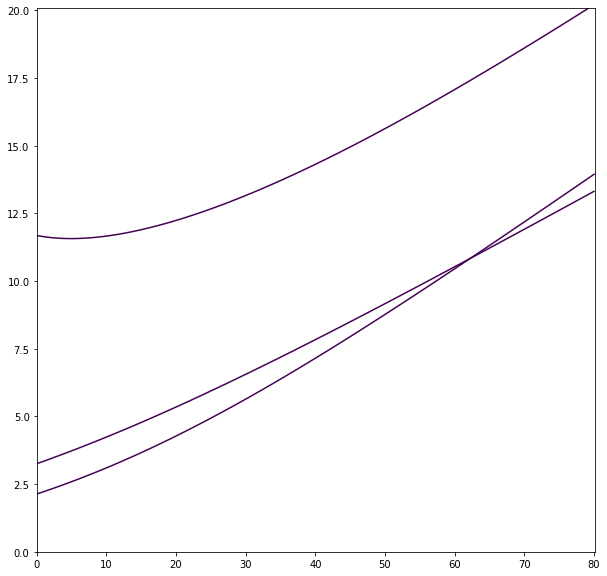

In [15]:
fig = plt.figure(1, figsize = (10,10))
delta = 0.025
b, w = np.meshgrid(np.arange(0, 80.1, delta), np.arange(0, 20.1, delta))

t = 0.1
f1 = -sample_var[0] + ((((0.2250e4 + 0.2250e4 * b * t) * np.power(w, 0.9e1) + (0.6750e4 * b * b * t + 0.2750e4 * b) * np.power(w, 0.8e1) + (0.4750e4 * np.power(b, 0.3e1) * t + 0.9250e4 * b * b) * np.power(w, 0.7e1) + (0.5250e4 * np.power(b, 0.4e1) * t + 0.10250e5 * np.power(b, 0.3e1)) * np.power(w, 0.6e1) + (0.2750e4 * np.power(b, 0.5e1) * t + 0.3250e4 * np.power(b, 0.4e1)) * np.power(w, 0.5e1) + (-0.9750e4 * np.power(b, 0.5e1) - 0.1750e4 * np.power(b, 0.6e1) * t) * np.power(w, 0.4e1) + (-0.4250e4 * np.power(b, 0.6e1) + 0.250e3 * np.power(b, 0.7e1) * t) * np.power(w, 0.3e1) + (-0.1250e4 * np.power(b, 0.7e1) - 0.250e3 * np.power(b, 0.8e1) * t) * w * w - 0.500e3 * np.power(b, 0.8e1) * w) * np.sin(w * t) + ((0.750e3 + 0.2250e4 * b * t) * np.power(w, 0.9e1) - 0.2250e4 * b * b * t * np.power(w, 0.8e1) + (-0.500e3 * b * b - 0.4250e4 * np.power(b, 0.3e1) * t) * np.power(w, 0.7e1) + (-0.9000e4 * np.power(b, 0.3e1) - 0.4750e4 * np.power(b, 0.4e1) * t) * np.power(w, 0.6e1) + (-0.17000e5 * np.power(b, 0.4e1) - 0.7250e4 * np.power(b, 0.5e1) * t) * np.power(w, 0.5e1) + (-0.2750e4 * np.power(b, 0.6e1) * t - 0.10000e5 * np.power(b, 0.5e1)) * np.power(w, 0.4e1) + (-0.750e3 * np.power(b, 0.7e1) * t + 0.500e3 * np.power(b, 0.6e1)) * np.power(w, 0.3e1) + (-0.1000e4 * np.power(b, 0.7e1) - 0.250e3 * np.power(b, 0.8e1) * t) * w * w + 0.250e3 * np.power(b, 0.8e1) * w) * np.cos(w * t)) * np.exp(-0.1e1 * b * t) + ((-0.125e3 * np.power(b, 0.6e1) * np.power(w, 0.3e1) + 0.500e3 * np.power(b, 0.4e1) * np.power(w, 0.5e1) + 0.3875e4 * b * b * np.power(w, 0.7e1) - 0.750e3 * np.power(w, 0.9e1)) * np.cos(0.2e1 * w * t) + (0.625e3 * np.power(b, 0.5e1) * np.power(w, 0.4e1) + 0.1750e4 * np.power(b, 0.3e1) * np.power(w, 0.6e1) - 0.2875e4 * b * np.power(w, 0.8e1)) * np.sin(0.2e1 * w * t) - 0.2375e4 * np.power(b, 0.3e1) * np.power(w, 0.6e1) - 0.1125e4 * b * np.power(w, 0.8e1) - 0.125e3 * np.power(b, 0.7e1) * w * w - 0.1375e4 * np.power(b, 0.5e1) * np.power(w, 0.4e1)) * np.exp(-0.2e1 * b * t) + 0.1125e4 * b * np.power(w, 0.8e1) + (-0.3375e4 * b * b - 0.2250e4 * np.power(b, 0.3e1) * t) * np.power(w, 0.7e1) + (0.11375e5 * np.power(b, 0.3e1) + 0.2250e4 * np.power(b, 0.4e1) * t) * np.power(w, 0.6e1) + (0.16500e5 * np.power(b, 0.4e1) - 0.250e3 * np.power(b, 0.5e1) * t) * np.power(w, 0.5e1) + (0.11375e5 * np.power(b, 0.5e1) + 0.4750e4 * np.power(b, 0.6e1) * t) * np.power(w, 0.4e1) + (-0.375e3 * np.power(b, 0.6e1) + 0.2250e4 * np.power(b, 0.7e1) * t) * np.power(w, 0.3e1) + (0.1125e4 * np.power(b, 0.7e1) + 0.2750e4 * np.power(b, 0.8e1) * t) * w * w + (-0.250e3 * np.power(b, 0.8e1) + 0.250e3 * np.power(b, 0.9e1) * t) * w + 0.250e3 * np.power(b, 0.10e2) * t) / (np.power(b, 0.4e1) + 0.2e1 * b * b * w * w + np.power(w, 0.4e1)) * np.power(b * b + w * w, -0.2e1) / (b * b + 0.9e1 * w * w)
f2 = -sample_var[1] + ((((0.2250e4 + 0.2250e4 * b * t) * np.power(w, 0.9e1) + (-0.6750e4 * b * b * t - 0.2750e4 * b) * np.power(w, 0.8e1) + (0.4750e4 * np.power(b, 0.3e1) * t + 0.9250e4 * b * b) * np.power(w, 0.7e1) + (-0.5250e4 * np.power(b, 0.4e1) * t - 0.10250e5 * np.power(b, 0.3e1)) * np.power(w, 0.6e1) + (0.2750e4 * np.power(b, 0.5e1) * t + 0.3250e4 * np.power(b, 0.4e1)) * np.power(w, 0.5e1) + (0.1750e4 * np.power(b, 0.6e1) * t + 0.9750e4 * np.power(b, 0.5e1)) * np.power(w, 0.4e1) + (-0.4250e4 * np.power(b, 0.6e1) + 0.250e3 * np.power(b, 0.7e1) * t) * np.power(w, 0.3e1) + (0.250e3 * np.power(b, 0.8e1) * t + 0.1250e4 * np.power(b, 0.7e1)) * w * w - 0.500e3 * np.power(b, 0.8e1) * w) * np.sin(w * t) + ((-0.750e3 - 0.2250e4 * b * t) * np.power(w, 0.9e1) - 0.2250e4 * b * b * t * np.power(w, 0.8e1) + (0.4250e4 * np.power(b, 0.3e1) * t + 0.500e3 * b * b) * np.power(w, 0.7e1) + (-0.9000e4 * np.power(b, 0.3e1) - 0.4750e4 * np.power(b, 0.4e1) * t) * np.power(w, 0.6e1) + (0.7250e4 * np.power(b, 0.5e1) * t + 0.17000e5 * np.power(b, 0.4e1)) * np.power(w, 0.5e1) + (-0.2750e4 * np.power(b, 0.6e1) * t - 0.10000e5 * np.power(b, 0.5e1)) * np.power(w, 0.4e1) + (0.750e3 * np.power(b, 0.7e1) * t - 0.500e3 * np.power(b, 0.6e1)) * np.power(w, 0.3e1) + (-0.1000e4 * np.power(b, 0.7e1) - 0.250e3 * np.power(b, 0.8e1) * t) * w * w - 0.250e3 * np.power(b, 0.8e1) * w) * np.cos(w * t)) * np.exp(-0.1e1 * b * t) + ((0.125e3 * np.power(b, 0.6e1) * np.power(w, 0.3e1) - 0.500e3 * np.power(b, 0.4e1) * np.power(w, 0.5e1) - 0.3875e4 * b * b * np.power(w, 0.7e1) + 0.750e3 * np.power(w, 0.9e1)) * np.cos(0.2e1 * w * t) + (-0.625e3 * np.power(b, 0.5e1) * np.power(w, 0.4e1) - 0.1750e4 * np.power(b, 0.3e1) * np.power(w, 0.6e1) + 0.2875e4 * b * np.power(w, 0.8e1)) * np.sin(0.2e1 * w * t) - 0.2375e4 * np.power(b, 0.3e1) * np.power(w, 0.6e1) - 0.1125e4 * b * np.power(w, 0.8e1) - 0.125e3 * np.power(b, 0.7e1) * w * w - 0.1375e4 * np.power(b, 0.5e1) * np.power(w, 0.4e1)) * np.exp(-0.2e1 * b * t) + 0.1125e4 * b * np.power(w, 0.8e1) + (0.3375e4 * b * b + 0.2250e4 * np.power(b, 0.3e1) * t) * np.power(w, 0.7e1) + (0.11375e5 * np.power(b, 0.3e1) + 0.2250e4 * np.power(b, 0.4e1) * t) * np.power(w, 0.6e1) + (-0.16500e5 * np.power(b, 0.4e1) + 0.250e3 * np.power(b, 0.5e1) * t) * np.power(w, 0.5e1) + (0.11375e5 * np.power(b, 0.5e1) + 0.4750e4 * np.power(b, 0.6e1) * t) * np.power(w, 0.4e1) + (0.375e3 * np.power(b, 0.6e1) - 0.2250e4 * np.power(b, 0.7e1) * t) * np.power(w, 0.3e1) + (0.1125e4 * np.power(b, 0.7e1) + 0.2750e4 * np.power(b, 0.8e1) * t) * w * w + (0.250e3 * np.power(b, 0.8e1) - 0.250e3 * np.power(b, 0.9e1) * t) * w + 0.250e3 * np.power(b, 0.10e2) * t) / (np.power(b, 0.4e1) + 0.2e1 * b * b * w * w + np.power(w, 0.4e1)) * np.power(b * b + w * w, -0.2e1) / (b * b + 0.9e1 * w * w)

plt.contour(b, w, f1, [0], colors = 'red')
plt.contour(b, w, f2, [0], colors = 'blue')

plt.show()

In [44]:
nbr = 2

sample_size = 10**4
niter = 5
sample_means = [[0 for _ in range(nbr)] for _ in range(niter)]
sample_vars = [[0 for _ in range(nbr)] for _ in range(niter)]
sample_covars = [[0 for _ in range(nbr - 1)] for _ in range(niter)]

n1 = [[] for _ in range(niter)]
n2 = [[] for _ in range(niter)]

w = 10
b = 50
t = 0.1

alpha = [[0, -w], [w, 0]]
beta = b
mu = 250

for iter in range(niter):
  for i in range(sample_size):
      eg1 = hawkes(nbr = 2, T = t, mu = mu, alpha = alpha, beta = beta)
      eg1.simulate()
      for j in range(nbr):
        sample_means[iter][j] += eg1.count[j]
        sample_vars[iter][j] += (eg1.count[j]**2)
      n1[iter].append(eg1.count[0])
      n2[iter].append(eg1.count[1])

for iter in range(niter):
  for j in range(nbr):
      sample_means[iter][j] /= (sample_size*1.0)
      sample_vars[iter][j] -= ((sample_means[iter][j]**2)*sample_size)
      sample_vars[iter][j] /= ((sample_size - 1)*1.0)



TypeError: ignored

In [ ]:
sample_covars = [[0 for _ in range(nbr - 1)] for _ in range(niter)]
for iter in range(niter):
  for i in range(sample_size):
      sample_covars[iter][0] += ((n1[iter][i] - sample_means[iter][0])*(n2[iter][i] - sample_means[iter][1]))
  sample_covars[iter][0] /= (sample_size-1)

In [51]:
print(sample_covars)

[[-1.2852517051705714], [-0.892541254125413], [-1.3431288728872957], [-1.7440479047904842], [-1.5727797779777923]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


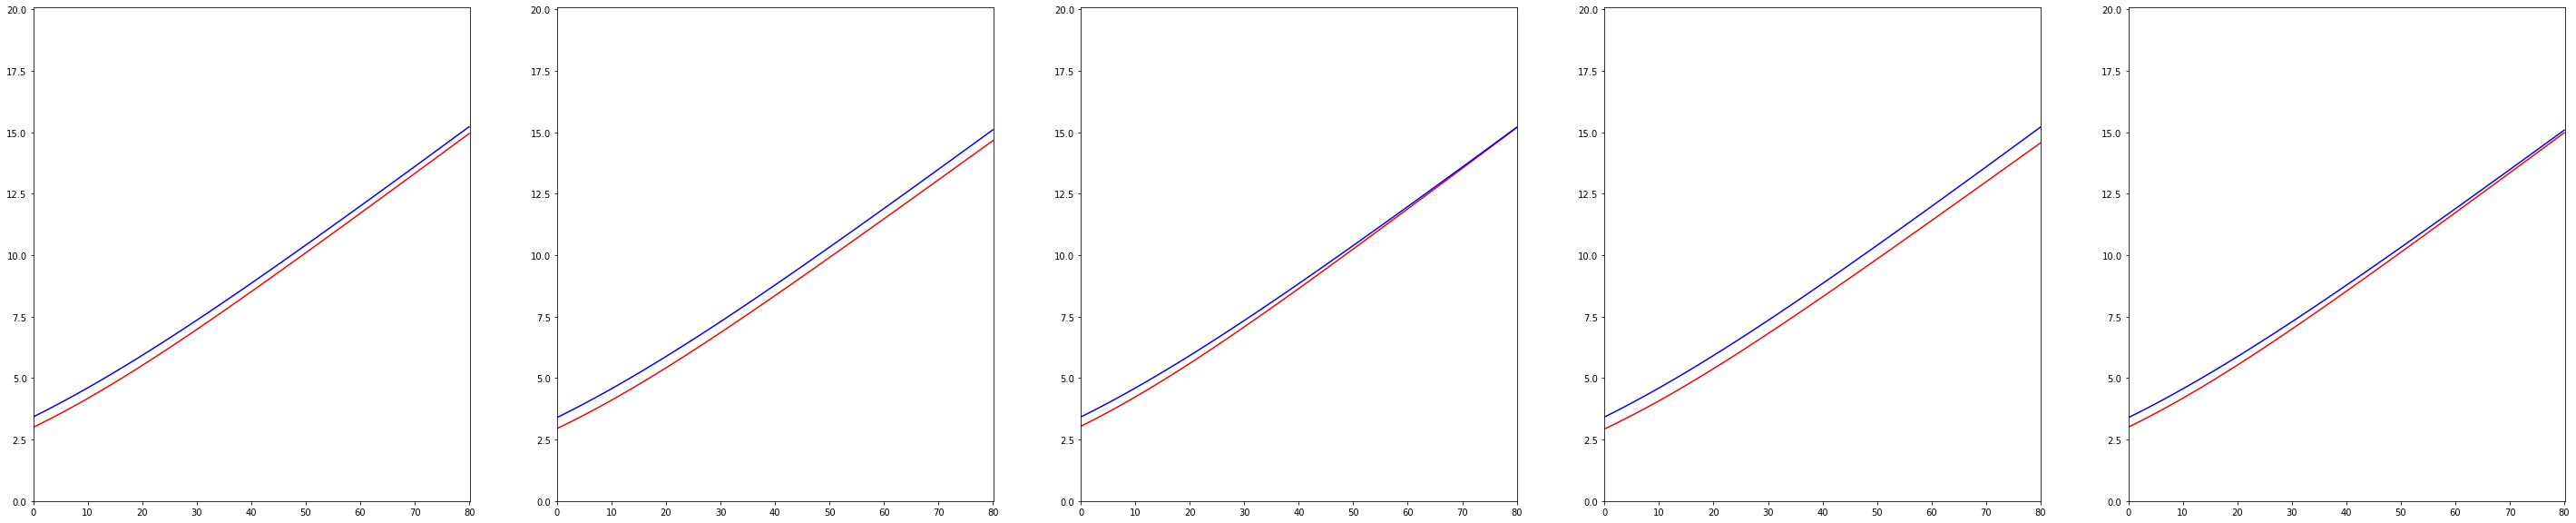

In [47]:
fig, ax = plt.subplots(1, 5, figsize=(50,10))
delta = 0.025
b, w = np.meshgrid(np.arange(0, 80.1, delta), np.arange(0, 20.1, delta))

for iter in range(niter):
  f1 = -sample_means[iter][0] + (((0.250e3 * b * b * w - 0.500e3 * b * w * w - 0.250e3 * np.power(w, 0.3e1)) * np.cos(w * t) + (-0.250e3 * b * b * w - 0.500e3 * b * w * w + 0.250e3 * np.power(w, 0.3e1)) * np.sin(w * t)) * np.exp(-0.1e1 * b * t) + (0.250e3 * b * t + 0.250e3) * np.power(w, 0.3e1) + (0.250e3 * b * b * t + 0.500e3 * b) * w * w + (0.250e3 * np.power(b, 0.3e1) * t - 0.250e3 * b * b) * w + 0.250e3 * np.power(b, 0.4e1) * t) * np.power(b * b + w * w, -0.2e1)
  f2 = -sample_means[iter][1] + (((-0.250e3 * b * b * w - 0.500e3 * b * w * w + 0.250e3 * np.power(w, 0.3e1)) * np.cos(w * t) + (-0.250e3 * b * b * w + 0.500e3 * b * w * w + 0.250e3 * np.power(w, 0.3e1)) * np.sin(w * t)) * np.exp(-0.1e1 * b * t) + (-0.250e3 * b * t - 0.250e3) * np.power(w, 0.3e1) + (0.250e3 * b * b * t + 0.500e3 * b) * w * w + (-0.250e3 * np.power(b, 0.3e1) * t + 0.250e3 * b * b) * w + 0.250e3 * np.power(b, 0.4e1) * t) * np.power(b * b + w * w, -0.2e1)
  ax[iter].contour(b, w, f1, [0], colors = 'red')
  ax[iter].contour(b, w, f2, [0], colors = 'blue')

plt.show()

In [48]:
for iter in range(niter):
  def sys_of_eqn(z):
    b = z[0]
    w = z[1]
    F = np.empty(2)
    t = 0.1
    F[0] = -sample_means[iter][0] + (((0.250e3 * b * b * w - 0.500e3 * b * w * w - 0.250e3 * pow(w, 0.3e1)) * cos(w * t) + (-0.250e3 * b * b * w - 0.500e3 * b * w * w + 0.250e3 * pow(w, 0.3e1)) * sin(w * t)) * exp(-0.1e1 * b * t) + (0.250e3 * b * t + 0.250e3) * pow(w, 0.3e1) + (0.250e3 * b * b * t + 0.500e3 * b) * w * w + (0.250e3 * pow(b, 0.3e1) * t - 0.250e3 * b * b) * w + 0.250e3 * pow(b, 0.4e1) * t) * pow(b * b + w * w, -0.2e1)
    F[1] = -sample_means[iter][1] + (((-0.250e3 * b * b * w - 0.500e3 * b * w * w + 0.250e3 * pow(w, 0.3e1)) * cos(w * t) + (-0.250e3 * b * b * w + 0.500e3 * b * w * w + 0.250e3 * pow(w, 0.3e1)) * sin(w * t)) * exp(-0.1e1 * b * t) + (-0.250e3 * b * t - 0.250e3) * pow(w, 0.3e1) + (0.250e3 * b * b * t + 0.500e3 * b) * w * w + (-0.250e3 * pow(b, 0.3e1) * t + 0.250e3 * b * b) * w + 0.250e3 * pow(b, 0.4e1) * t) * pow(b * b + w * w, -0.2e1)
    return F
  zGuess = np.array([50,10])
  z = fsolve(sys_of_eqn, zGuess)
  print(z)

[50035.43230127  8311.08261603]
[185980.63779676  30566.28116764]
[85.98915625 16.17906647]
[2297196.53718794  379226.29661528]
[245.66299932  42.23119072]


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys


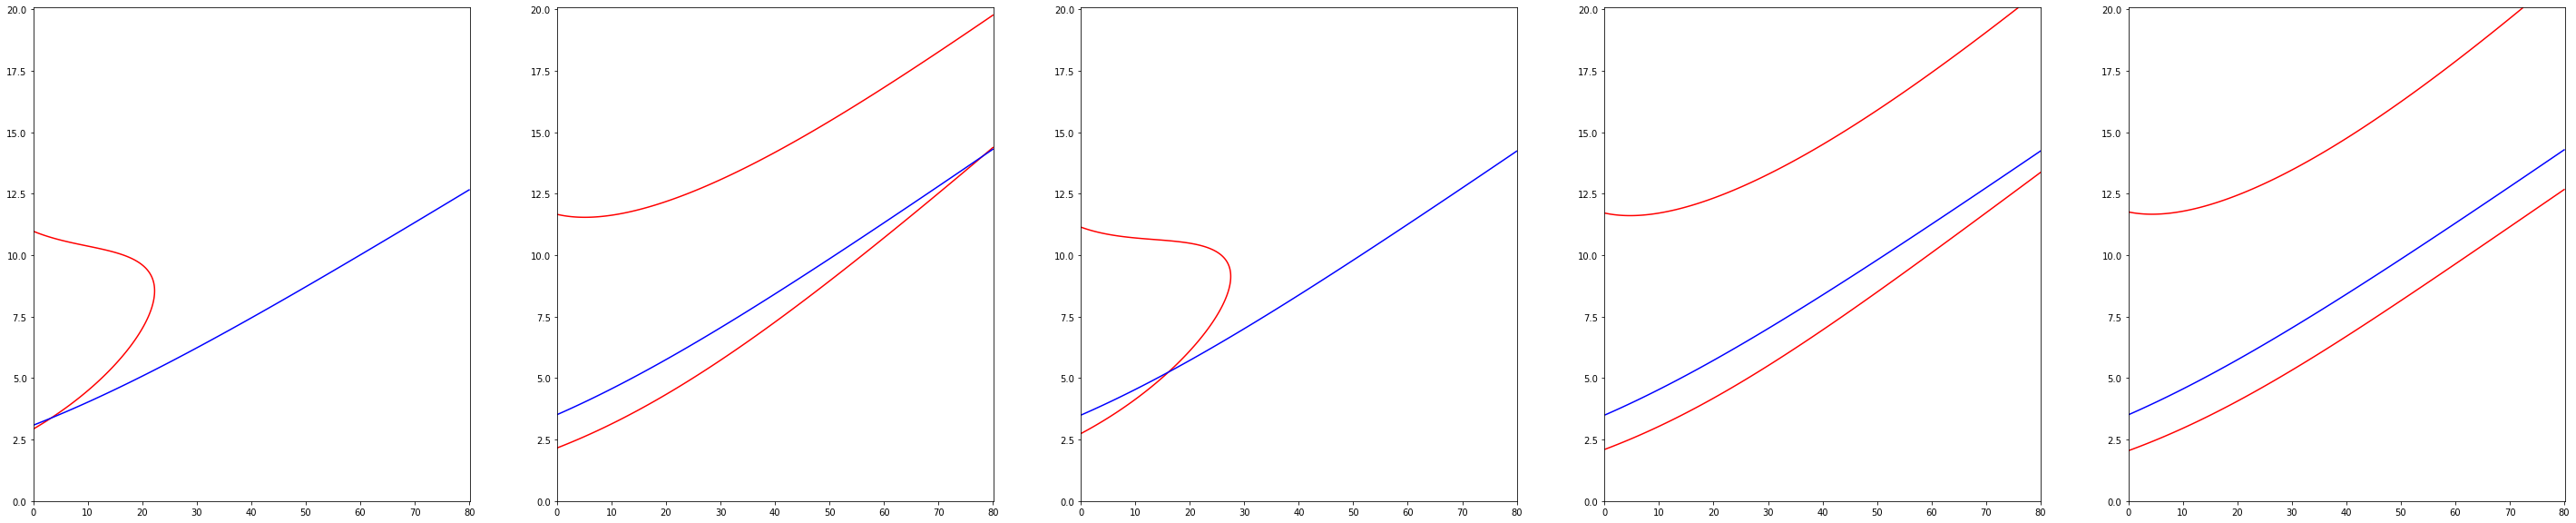

In [50]:
fig, ax = plt.subplots(1, 5, figsize = (50, 10))
delta = 0.025
b, w = np.meshgrid(np.arange(0, 80.1, delta), np.arange(0, 20.1, delta))

for iter in range(niter):
  f1 = -sample_vars[iter][0] + ((((0.2250e4 + 0.2250e4 * b * t) * np.power(w, 0.9e1) + (0.6750e4 * b * b * t + 0.2750e4 * b) * np.power(w, 0.8e1) + (0.4750e4 * np.power(b, 0.3e1) * t + 0.9250e4 * b * b) * np.power(w, 0.7e1) + (0.5250e4 * np.power(b, 0.4e1) * t + 0.10250e5 * np.power(b, 0.3e1)) * np.power(w, 0.6e1) + (0.2750e4 * np.power(b, 0.5e1) * t + 0.3250e4 * np.power(b, 0.4e1)) * np.power(w, 0.5e1) + (-0.9750e4 * np.power(b, 0.5e1) - 0.1750e4 * np.power(b, 0.6e1) * t) * np.power(w, 0.4e1) + (-0.4250e4 * np.power(b, 0.6e1) + 0.250e3 * np.power(b, 0.7e1) * t) * np.power(w, 0.3e1) + (-0.1250e4 * np.power(b, 0.7e1) - 0.250e3 * np.power(b, 0.8e1) * t) * w * w - 0.500e3 * np.power(b, 0.8e1) * w) * np.sin(w * t) + ((0.750e3 + 0.2250e4 * b * t) * np.power(w, 0.9e1) - 0.2250e4 * b * b * t * np.power(w, 0.8e1) + (-0.500e3 * b * b - 0.4250e4 * np.power(b, 0.3e1) * t) * np.power(w, 0.7e1) + (-0.9000e4 * np.power(b, 0.3e1) - 0.4750e4 * np.power(b, 0.4e1) * t) * np.power(w, 0.6e1) + (-0.17000e5 * np.power(b, 0.4e1) - 0.7250e4 * np.power(b, 0.5e1) * t) * np.power(w, 0.5e1) + (-0.2750e4 * np.power(b, 0.6e1) * t - 0.10000e5 * np.power(b, 0.5e1)) * np.power(w, 0.4e1) + (-0.750e3 * np.power(b, 0.7e1) * t + 0.500e3 * np.power(b, 0.6e1)) * np.power(w, 0.3e1) + (-0.1000e4 * np.power(b, 0.7e1) - 0.250e3 * np.power(b, 0.8e1) * t) * w * w + 0.250e3 * np.power(b, 0.8e1) * w) * np.cos(w * t)) * np.exp(-0.1e1 * b * t) + ((-0.125e3 * np.power(b, 0.6e1) * np.power(w, 0.3e1) + 0.500e3 * np.power(b, 0.4e1) * np.power(w, 0.5e1) + 0.3875e4 * b * b * np.power(w, 0.7e1) - 0.750e3 * np.power(w, 0.9e1)) * np.cos(0.2e1 * w * t) + (0.625e3 * np.power(b, 0.5e1) * np.power(w, 0.4e1) + 0.1750e4 * np.power(b, 0.3e1) * np.power(w, 0.6e1) - 0.2875e4 * b * np.power(w, 0.8e1)) * np.sin(0.2e1 * w * t) - 0.2375e4 * np.power(b, 0.3e1) * np.power(w, 0.6e1) - 0.1125e4 * b * np.power(w, 0.8e1) - 0.125e3 * np.power(b, 0.7e1) * w * w - 0.1375e4 * np.power(b, 0.5e1) * np.power(w, 0.4e1)) * np.exp(-0.2e1 * b * t) + 0.1125e4 * b * np.power(w, 0.8e1) + (-0.3375e4 * b * b - 0.2250e4 * np.power(b, 0.3e1) * t) * np.power(w, 0.7e1) + (0.11375e5 * np.power(b, 0.3e1) + 0.2250e4 * np.power(b, 0.4e1) * t) * np.power(w, 0.6e1) + (0.16500e5 * np.power(b, 0.4e1) - 0.250e3 * np.power(b, 0.5e1) * t) * np.power(w, 0.5e1) + (0.11375e5 * np.power(b, 0.5e1) + 0.4750e4 * np.power(b, 0.6e1) * t) * np.power(w, 0.4e1) + (-0.375e3 * np.power(b, 0.6e1) + 0.2250e4 * np.power(b, 0.7e1) * t) * np.power(w, 0.3e1) + (0.1125e4 * np.power(b, 0.7e1) + 0.2750e4 * np.power(b, 0.8e1) * t) * w * w + (-0.250e3 * np.power(b, 0.8e1) + 0.250e3 * np.power(b, 0.9e1) * t) * w + 0.250e3 * np.power(b, 0.10e2) * t) / (np.power(b, 0.4e1) + 0.2e1 * b * b * w * w + np.power(w, 0.4e1)) * np.power(b * b + w * w, -0.2e1) / (b * b + 0.9e1 * w * w)
  f2 = -sample_vars[iter][1] + ((((0.2250e4 + 0.2250e4 * b * t) * np.power(w, 0.9e1) + (-0.6750e4 * b * b * t - 0.2750e4 * b) * np.power(w, 0.8e1) + (0.4750e4 * np.power(b, 0.3e1) * t + 0.9250e4 * b * b) * np.power(w, 0.7e1) + (-0.5250e4 * np.power(b, 0.4e1) * t - 0.10250e5 * np.power(b, 0.3e1)) * np.power(w, 0.6e1) + (0.2750e4 * np.power(b, 0.5e1) * t + 0.3250e4 * np.power(b, 0.4e1)) * np.power(w, 0.5e1) + (0.1750e4 * np.power(b, 0.6e1) * t + 0.9750e4 * np.power(b, 0.5e1)) * np.power(w, 0.4e1) + (-0.4250e4 * np.power(b, 0.6e1) + 0.250e3 * np.power(b, 0.7e1) * t) * np.power(w, 0.3e1) + (0.250e3 * np.power(b, 0.8e1) * t + 0.1250e4 * np.power(b, 0.7e1)) * w * w - 0.500e3 * np.power(b, 0.8e1) * w) * np.sin(w * t) + ((-0.750e3 - 0.2250e4 * b * t) * np.power(w, 0.9e1) - 0.2250e4 * b * b * t * np.power(w, 0.8e1) + (0.4250e4 * np.power(b, 0.3e1) * t + 0.500e3 * b * b) * np.power(w, 0.7e1) + (-0.9000e4 * np.power(b, 0.3e1) - 0.4750e4 * np.power(b, 0.4e1) * t) * np.power(w, 0.6e1) + (0.7250e4 * np.power(b, 0.5e1) * t + 0.17000e5 * np.power(b, 0.4e1)) * np.power(w, 0.5e1) + (-0.2750e4 * np.power(b, 0.6e1) * t - 0.10000e5 * np.power(b, 0.5e1)) * np.power(w, 0.4e1) + (0.750e3 * np.power(b, 0.7e1) * t - 0.500e3 * np.power(b, 0.6e1)) * np.power(w, 0.3e1) + (-0.1000e4 * np.power(b, 0.7e1) - 0.250e3 * np.power(b, 0.8e1) * t) * w * w - 0.250e3 * np.power(b, 0.8e1) * w) * np.cos(w * t)) * np.exp(-0.1e1 * b * t) + ((0.125e3 * np.power(b, 0.6e1) * np.power(w, 0.3e1) - 0.500e3 * np.power(b, 0.4e1) * np.power(w, 0.5e1) - 0.3875e4 * b * b * np.power(w, 0.7e1) + 0.750e3 * np.power(w, 0.9e1)) * np.cos(0.2e1 * w * t) + (-0.625e3 * np.power(b, 0.5e1) * np.power(w, 0.4e1) - 0.1750e4 * np.power(b, 0.3e1) * np.power(w, 0.6e1) + 0.2875e4 * b * np.power(w, 0.8e1)) * np.sin(0.2e1 * w * t) - 0.2375e4 * np.power(b, 0.3e1) * np.power(w, 0.6e1) - 0.1125e4 * b * np.power(w, 0.8e1) - 0.125e3 * np.power(b, 0.7e1) * w * w - 0.1375e4 * np.power(b, 0.5e1) * np.power(w, 0.4e1)) * np.exp(-0.2e1 * b * t) + 0.1125e4 * b * np.power(w, 0.8e1) + (0.3375e4 * b * b + 0.2250e4 * np.power(b, 0.3e1) * t) * np.power(w, 0.7e1) + (0.11375e5 * np.power(b, 0.3e1) + 0.2250e4 * np.power(b, 0.4e1) * t) * np.power(w, 0.6e1) + (-0.16500e5 * np.power(b, 0.4e1) + 0.250e3 * np.power(b, 0.5e1) * t) * np.power(w, 0.5e1) + (0.11375e5 * np.power(b, 0.5e1) + 0.4750e4 * np.power(b, 0.6e1) * t) * np.power(w, 0.4e1) + (0.375e3 * np.power(b, 0.6e1) - 0.2250e4 * np.power(b, 0.7e1) * t) * np.power(w, 0.3e1) + (0.1125e4 * np.power(b, 0.7e1) + 0.2750e4 * np.power(b, 0.8e1) * t) * w * w + (0.250e3 * np.power(b, 0.8e1) - 0.250e3 * np.power(b, 0.9e1) * t) * w + 0.250e3 * np.power(b, 0.10e2) * t) / (np.power(b, 0.4e1) + 0.2e1 * b * b * w * w + np.power(w, 0.4e1)) * np.power(b * b + w * w, -0.2e1) / (b * b + 0.9e1 * w * w)
  ax[iter].contour(b, w, f1, [0], colors = 'red')
  ax[iter].contour(b, w, f2, [0], colors = 'blue')

plt.show()

In [52]:
for iter in range(niter):
  def sys_of_eqn(z):
    b = z[0]
    w = z[1]
    F = np.empty(2)
    t = 0.1
    F[0] = -sample_vars[iter][0] + ((((0.2250e4 + 0.2250e4 * b * t) * pow(w, 0.9e1) + (0.6750e4 * b * b * t + 0.2750e4 * b) * pow(w, 0.8e1) + (0.4750e4 * pow(b, 0.3e1) * t + 0.9250e4 * b * b) * pow(w, 0.7e1) + (0.5250e4 * pow(b, 0.4e1) * t + 0.10250e5 * pow(b, 0.3e1)) * pow(w, 0.6e1) + (0.2750e4 * pow(b, 0.5e1) * t + 0.3250e4 * pow(b, 0.4e1)) * pow(w, 0.5e1) + (-0.9750e4 * pow(b, 0.5e1) - 0.1750e4 * pow(b, 0.6e1) * t) * pow(w, 0.4e1) + (-0.4250e4 * pow(b, 0.6e1) + 0.250e3 * pow(b, 0.7e1) * t) * pow(w, 0.3e1) + (-0.1250e4 * pow(b, 0.7e1) - 0.250e3 * pow(b, 0.8e1) * t) * w * w - 0.500e3 * pow(b, 0.8e1) * w) * sin(w * t) + ((0.750e3 + 0.2250e4 * b * t) * pow(w, 0.9e1) - 0.2250e4 * b * b * t * pow(w, 0.8e1) + (-0.500e3 * b * b - 0.4250e4 * pow(b, 0.3e1) * t) * pow(w, 0.7e1) + (-0.9000e4 * pow(b, 0.3e1) - 0.4750e4 * pow(b, 0.4e1) * t) * pow(w, 0.6e1) + (-0.17000e5 * pow(b, 0.4e1) - 0.7250e4 * pow(b, 0.5e1) * t) * pow(w, 0.5e1) + (-0.2750e4 * pow(b, 0.6e1) * t - 0.10000e5 * pow(b, 0.5e1)) * pow(w, 0.4e1) + (-0.750e3 * pow(b, 0.7e1) * t + 0.500e3 * pow(b, 0.6e1)) * pow(w, 0.3e1) + (-0.1000e4 * pow(b, 0.7e1) - 0.250e3 * pow(b, 0.8e1) * t) * w * w + 0.250e3 * pow(b, 0.8e1) * w) * cos(w * t)) * exp(-0.1e1 * b * t) + ((-0.125e3 * pow(b, 0.6e1) * pow(w, 0.3e1) + 0.500e3 * pow(b, 0.4e1) * pow(w, 0.5e1) + 0.3875e4 * b * b * pow(w, 0.7e1) - 0.750e3 * pow(w, 0.9e1)) * cos(0.2e1 * w * t) + (0.625e3 * pow(b, 0.5e1) * pow(w, 0.4e1) + 0.1750e4 * pow(b, 0.3e1) * pow(w, 0.6e1) - 0.2875e4 * b * pow(w, 0.8e1)) * sin(0.2e1 * w * t) - 0.2375e4 * pow(b, 0.3e1) * pow(w, 0.6e1) - 0.1125e4 * b * pow(w, 0.8e1) - 0.125e3 * pow(b, 0.7e1) * w * w - 0.1375e4 * pow(b, 0.5e1) * pow(w, 0.4e1)) * exp(-0.2e1 * b * t) + 0.1125e4 * b * pow(w, 0.8e1) + (-0.3375e4 * b * b - 0.2250e4 * pow(b, 0.3e1) * t) * pow(w, 0.7e1) + (0.11375e5 * pow(b, 0.3e1) + 0.2250e4 * pow(b, 0.4e1) * t) * pow(w, 0.6e1) + (0.16500e5 * pow(b, 0.4e1) - 0.250e3 * pow(b, 0.5e1) * t) * pow(w, 0.5e1) + (0.11375e5 * pow(b, 0.5e1) + 0.4750e4 * pow(b, 0.6e1) * t) * pow(w, 0.4e1) + (-0.375e3 * pow(b, 0.6e1) + 0.2250e4 * pow(b, 0.7e1) * t) * pow(w, 0.3e1) + (0.1125e4 * pow(b, 0.7e1) + 0.2750e4 * pow(b, 0.8e1) * t) * w * w + (-0.250e3 * pow(b, 0.8e1) + 0.250e3 * pow(b, 0.9e1) * t) * w + 0.250e3 * pow(b, 0.10e2) * t) / (pow(b, 0.4e1) + 0.2e1 * b * b * w * w + pow(w, 0.4e1)) * pow(b * b + w * w, -0.2e1) / (b * b + 0.9e1 * w * w)
    F[1] = -sample_vars[iter][1] + ((((0.2250e4 + 0.2250e4 * b * t) * pow(w, 0.9e1) + (-0.6750e4 * b * b * t - 0.2750e4 * b) * pow(w, 0.8e1) + (0.4750e4 * pow(b, 0.3e1) * t + 0.9250e4 * b * b) * pow(w, 0.7e1) + (-0.5250e4 * pow(b, 0.4e1) * t - 0.10250e5 * pow(b, 0.3e1)) * pow(w, 0.6e1) + (0.2750e4 * pow(b, 0.5e1) * t + 0.3250e4 * pow(b, 0.4e1)) * pow(w, 0.5e1) + (0.1750e4 * pow(b, 0.6e1) * t + 0.9750e4 * pow(b, 0.5e1)) * pow(w, 0.4e1) + (-0.4250e4 * pow(b, 0.6e1) + 0.250e3 * pow(b, 0.7e1) * t) * pow(w, 0.3e1) + (0.250e3 * pow(b, 0.8e1) * t + 0.1250e4 * pow(b, 0.7e1)) * w * w - 0.500e3 * pow(b, 0.8e1) * w) * sin(w * t) + ((-0.750e3 - 0.2250e4 * b * t) * pow(w, 0.9e1) - 0.2250e4 * b * b * t * pow(w, 0.8e1) + (0.4250e4 * pow(b, 0.3e1) * t + 0.500e3 * b * b) * pow(w, 0.7e1) + (-0.9000e4 * pow(b, 0.3e1) - 0.4750e4 * pow(b, 0.4e1) * t) * pow(w, 0.6e1) + (0.7250e4 * pow(b, 0.5e1) * t + 0.17000e5 * pow(b, 0.4e1)) * pow(w, 0.5e1) + (-0.2750e4 * pow(b, 0.6e1) * t - 0.10000e5 * pow(b, 0.5e1)) * pow(w, 0.4e1) + (0.750e3 * pow(b, 0.7e1) * t - 0.500e3 * pow(b, 0.6e1)) * pow(w, 0.3e1) + (-0.1000e4 * pow(b, 0.7e1) - 0.250e3 * pow(b, 0.8e1) * t) * w * w - 0.250e3 * pow(b, 0.8e1) * w) * cos(w * t)) * exp(-0.1e1 * b * t) + ((0.125e3 * pow(b, 0.6e1) * pow(w, 0.3e1) - 0.500e3 * pow(b, 0.4e1) * pow(w, 0.5e1) - 0.3875e4 * b * b * pow(w, 0.7e1) + 0.750e3 * pow(w, 0.9e1)) * cos(0.2e1 * w * t) + (-0.625e3 * pow(b, 0.5e1) * pow(w, 0.4e1) - 0.1750e4 * pow(b, 0.3e1) * pow(w, 0.6e1) + 0.2875e4 * b * pow(w, 0.8e1)) * sin(0.2e1 * w * t) - 0.2375e4 * pow(b, 0.3e1) * pow(w, 0.6e1) - 0.1125e4 * b * pow(w, 0.8e1) - 0.125e3 * pow(b, 0.7e1) * w * w - 0.1375e4 * pow(b, 0.5e1) * pow(w, 0.4e1)) * exp(-0.2e1 * b * t) + 0.1125e4 * b * pow(w, 0.8e1) + (0.3375e4 * b * b + 0.2250e4 * pow(b, 0.3e1) * t) * pow(w, 0.7e1) + (0.11375e5 * pow(b, 0.3e1) + 0.2250e4 * pow(b, 0.4e1) * t) * pow(w, 0.6e1) + (-0.16500e5 * pow(b, 0.4e1) + 0.250e3 * pow(b, 0.5e1) * t) * pow(w, 0.5e1) + (0.11375e5 * pow(b, 0.5e1) + 0.4750e4 * pow(b, 0.6e1) * t) * pow(w, 0.4e1) + (0.375e3 * pow(b, 0.6e1) - 0.2250e4 * pow(b, 0.7e1) * t) * pow(w, 0.3e1) + (0.1125e4 * pow(b, 0.7e1) + 0.2750e4 * pow(b, 0.8e1) * t) * w * w + (0.250e3 * pow(b, 0.8e1) - 0.250e3 * pow(b, 0.9e1) * t) * w + 0.250e3 * pow(b, 0.10e2) * t) / (pow(b, 0.4e1) + 0.2e1 * b * b * w * w + pow(w, 0.4e1)) * pow(b * b + w * w, -0.2e1) / (b * b + 0.9e1 * w * w) 
    return F

  zGuess = np.array([50,10])
  z = fsolve(sys_of_eqn, zGuess)
  print(z)

[3.266052  3.3735591]
[78.09614318 14.02434479]
[16.10043907  5.24464283]
[149.43418135  24.8067173 ]
[87092565.31705244 13464907.16541862]


In [53]:
!pip install -q --pre poetry
!poetry --version

     |████████████████████████████████| 212 kB 4.6 MB/s 
     |████████████████████████████████| 8.8 MB 41.8 MB/s 
     |████████████████████████████████| 498 kB 47.8 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 531 kB 70.9 MB/s 
     |████████████████████████████████| 83 kB 1.4 MB/s 
     |████████████████████████████████| 140 kB 57.2 MB/s 
     |████████████████████████████████| 78 kB 6.3 MB/s 
     |████████████████████████████████| 48 kB 5.0 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 4.0 MB 45.0 MB/s 
     |████████████████████████████████| 468 kB 66.2 MB/s 
Poetry (version 1.2.2)


In [58]:
import os
os.chdir("/content")

!git config --global user.email <"ndqchi1811@gmail.com">
!git config --global user.name <"ndqchi">

!git clone https://github.com/paulknysh/blackbox.git

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `git config --global user.email <"ndqchi1811@gmail.com">'
/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `git config --global user.name <"ndqchi">'
Cloning into 'blackbox'...
remote: Enumerating objects: 305, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 305 (delta 10), reused 24 (delta 6), pack-reused 274
Receiving objects: 100% (305/305), 238.86 KiB | 2.91 MiB/s, done.
Resolving deltas: 100% (138/138), done.


In [59]:
os.chdir("/content/blackbox")

!poetry config virtualenvs.in-project false

!poetry install
# !poetry run pip install <Extra Dependency Name>  

The currently activated Python version 3.7.15 is not supported by the project (~3.9.7).
Trying to find and use a compatible version. 

Poetry was unable to find a compatible version. If you have one, you can explicitly use it via the "env use" command.


In [57]:
import blackbox as bb

ModuleNotFoundError: ignored